In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/adult-census-income")

print("Path to dataset files:", path)

100%|██████████| 450k/450k [00:01<00:00, 383kB/s]

Extracting files...
Path to dataset files: /home/ashi4evr1/.cache/kagglehub/datasets/uciml/adult-census-income/versions/3


In [3]:
import shutil
import os

In [4]:
shutil.copytree(path, "Task_1/data/raw", dirs_exist_ok = True)

file = os.listdir("Task_1/data/raw")
print(file)

['adult.csv']


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [7]:
df = pd.read_csv("Task_1/data/raw/adult.csv")

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.shape

(32561, 15)

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

<pre style = "background-color: red; border-radius: 20px; font-color: white; font-size: 24px;
text-align: center; padding: 10px; width: 90% ">
🏳️About the Dataset🏳️

<pre>

- This data was extracted from the 1994 Census bureau database.

- This is a prediction task dataset to determine whether a person makes over $50K a year. 


<pre style = "background-color: blue; border-radius: 10px; font-color: white; font-size: px;
text-align: center; padding: 10px; width: 90% ">
Why choose this dataset?

<pre>

- This dataset have Mixed data types.
- Have missing vlaues
- Data cleaning is needed
- We can do categorical encoding and 
- Feature scaling as well. 

>> So, overall, this is perfect for demonstrating data understanding and preprocessing tasks.



In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(24)

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [16]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

## Data Dictionary

<pre>

<h2>📊 Data Dictionary – Adult Census Income Dataset</h2>

Column Name	                        Description	                                                     Data Type

age	                        Age of the individual	                                                Numerical (Integer)
workclass	                Type of employment (e.g., Private, Govt, Self-employed)	                Categorical
fnlwgt	                        Final sampling weight assigned by the Census Bureau	                Numerical (Integer)
education	                Highest level of education achieved	                                Categorical
education.num	                Numeric representation of education level	                        Numerical (Integer)
marital.status	                Marital status of the individual	                                Categorical
occupation	                Occupation category	                                                Categorical
relationship	                Relationship status within the household	                        Categorical
race	                        Race of the individual	                                                Categorical
sex	                        Gender of the individual	                                        Categorical
capital.gain	                Capital gains income	                                                Numerical (Integer)
capital.loss	                Capital losses incurred	                                                Numerical (Integer)
hours.per.week	                Average working hours per week	                                        Numerical (Integer)
native.country	                Country of origin	                                                Categorical
income	                        Income category (≤50K or >50K) – Target Variable	                Categorical (Binary)



<pre>

fnlwgt A.K.A Final weight 

-- this represents census sampling weight.
-- In other words, each record (row) in this data is not just one person. 
-- It is a statistical representative of many similar individuals in the population.

>> Since it reflects survey design rather than individual characteristics, we will exclude it from the 
   model training to avoid introducing sampling bias. 

In [17]:
df.drop(columns = 'fnlwgt', axis = 1, inplace = True)

In [18]:
df.sample(3)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
20089,26,Private,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
24840,47,Private,11th,7,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
9430,56,Private,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [21]:
# --- We will see how the eduaction and education.num are related ---

df[['education', 'education.num']].sort_values('education.num')

,education,education.num
27861,Preschool,1
6773,Preschool,1
6718,Preschool,1
31891,Preschool,1
14432,Preschool,1
...,...,...
4311,Doctorate,16
4286,Doctorate,16
7,Doctorate,16
24453,Doctorate,16


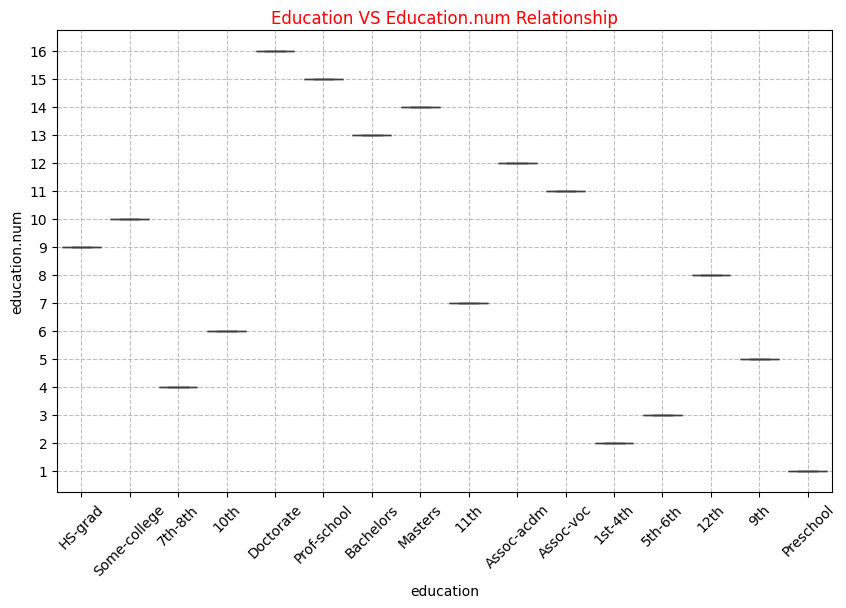

In [29]:
plt.figure(figsize = (10, 6))
sns.boxplot(
    data = df, 
    x = 'education', 
    y = 'education.num', 
)
plt.xticks(rotation = 45)
plt.yticks(range(1, 17))
plt.grid(True, linestyle = '--', alpha = 0.8)
plt.title('Education VS Education.num Relationship', color = 'red', pad = 5)
plt.show()


In [30]:
pd.crosstab(df['education'], df['education.num'])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,332,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,645,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


Text(0.5, 1.0, 'Education VS Education.num Relationship')

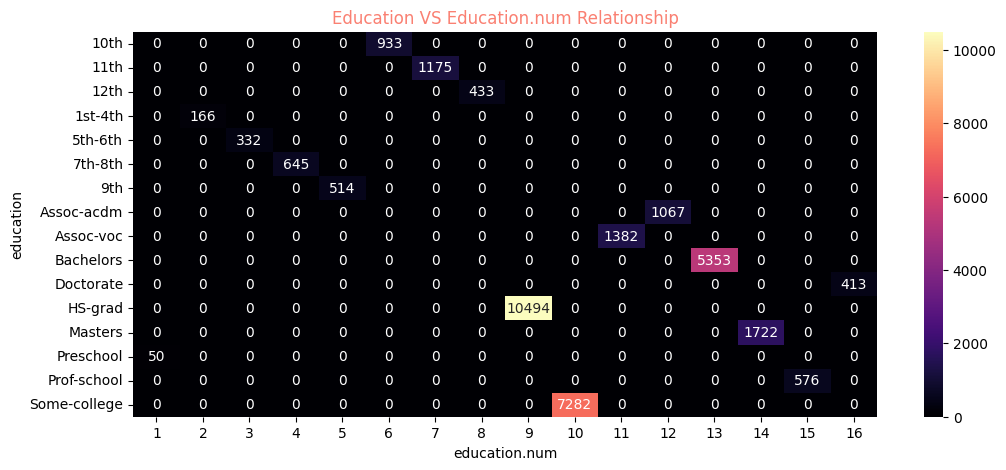

In [36]:
ct_edu = pd.crosstab(df['education'], df['education.num'])

plt.figure(figsize = (12, 5))
sns.heatmap(ct_edu, annot = True, fmt = 'd', cmap = 'magma')
plt.title('Education VS Education.num Relationship', color = 'salmon')

<pre>

- SO, here we ca clearly see that both education and education.num represents one and the same thing but at 
  different granularities.
- Since both convey identical information, only educaiton.num will be retained for modeling to avoid multicollinearity.



In [40]:
df.drop(columns = 'education', axis = 1, inplace = True)

In [42]:
df.sample(3)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
23232,35,Private,11,Never-married,Other-service,Not-in-family,White,Female,0,0,65,United-States,<=50K
26118,48,Private,13,Divorced,Sales,Not-in-family,Black,Male,0,0,40,United-States,>50K
26997,36,Private,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K


<pre>

Now, this is the data we need, and let's see if there's any missing values or unknown vlaues in this one.



In [43]:
def details(df, col):
    print(df[col].value_counts())

In [44]:
details(df, 'workclass')

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


<pre>

- We have 1836 unknown work classes in our data.
- We will on that later.



In [45]:
details(df, 'marital.status')

marital.status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


In [46]:
details(df, 'occupation')

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64


<pre>

- In occupation as well, we have 1843 unknown occupations, 
- Clearly indicates a correlation with the workclass, we will analyze it later



In [47]:
details(df, 'relationship')

relationship
Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64


In [48]:
details(df, 'race')

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


In [49]:
details(df, 'sex')

sex
Male      21775
Female    10762
Name: count, dtype: int64


In [50]:
details(df, 'income')

income
<=50K    24698
>50K      7839
Name: count, dtype: int64


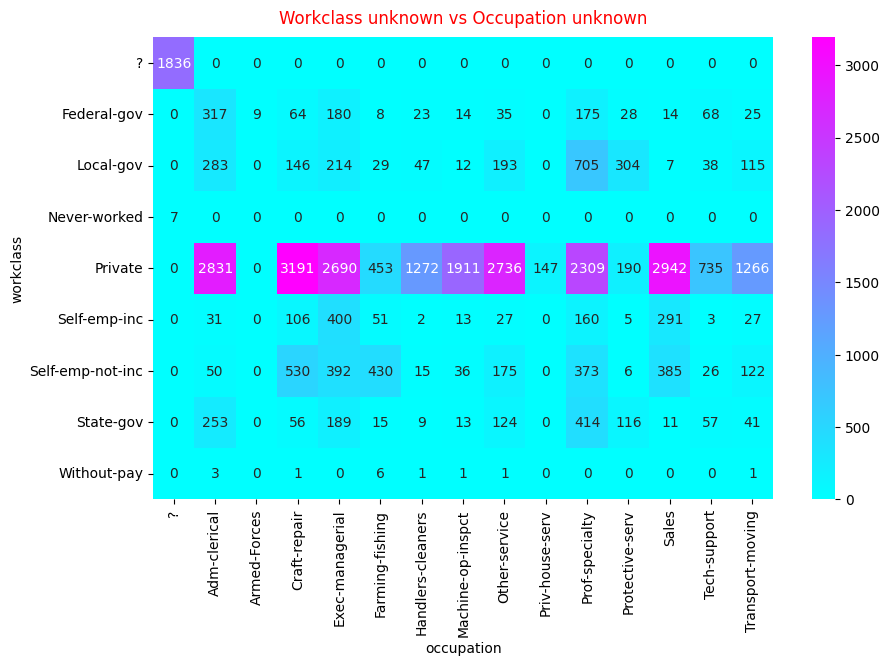

In [58]:
# --- we will see a heatmap b/w workclass and occupation ---

ct_work = pd.crosstab(df['workclass'], df['occupation'])

plt.figure(figsize = (10, 6))
sns.heatmap(ct_work, annot = True, fmt = 'd', cmap = 'cool')
plt.title('Workclass unknown vs Occupation unknown', pad = 10, color = 'red')
plt.show()

<pre>

- We cna see how unknown in occupation is distributed to workclass's "never-worked" and 
- work class's "unknown"

- This means missingness is not Random, (MNAR)
- The two columns are structurally related. 

In [61]:
# --- We will use a chi-square test to prove that these columsn are indeed dependent on each other ---

from scipy.stats import chi2_contingency

ct = pd.crosstab(df['workclass'], df['occupation'])

chi2, p, dof, expaected = chi2_contingency(ct)

print(p)

0.0


<pre>

SInce significance value is 0, less than 0.05, then that means that we will reject null hypothesis 
and there is a significant relationship b/w workclass and occupation and indeed thay are not independent (statistically).


>> Also, we will not impute those unknown values with mode here, 

- Because mode will inject false information in this context, 
- inflate certian categoties and 
- mislead the model. 

>> So, we will treat this "?" as unknown only, so that we will preserve information without introducing bias. 




In [62]:
df['workclass'] = df['workclass'].replace("?", "unknown")
df['occupation'] = df['occupation'].replace("?", "unknown")

In [63]:
details(df, 'workclass')

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [64]:
details(df, 'occupation')

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64


<pre>

For following columns, now we need to encode these, but will not use ordina encoding for that, because ordinal encoding will then introduce a false order and a fake numerical relationship which can hurt our model.

Instead we will use OHE 

1) workclass
2) marital.status
3) occupation
4) relationship
5) race
6) native.country


Until unless told, we cannot assume any specific order here, or if any order 
is suspected, then you can consult domain specialist for recommendations.

>> For sex and income we will do a bnary encoding by simply mapping it 





In [66]:
details(df, 'sex')

sex
Male      21775
Female    10762
Name: count, dtype: int64


In [68]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [69]:
details(df, 'income')

income
<=50K    24698
>50K      7839
Name: count, dtype: int64


<pre>

As you can see classes are heavily imbalanced here, so we must come up with a way to balance the classes
before we do the modeling. 



In [70]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [71]:
df.sample(3)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
19565,61,Private,4,Never-married,Other-service,Not-in-family,White,1,0,0,48,United-States,0
15026,27,Private,13,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,1,0,0,40,Philippines,0
6499,54,Private,9,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,45,United-States,0


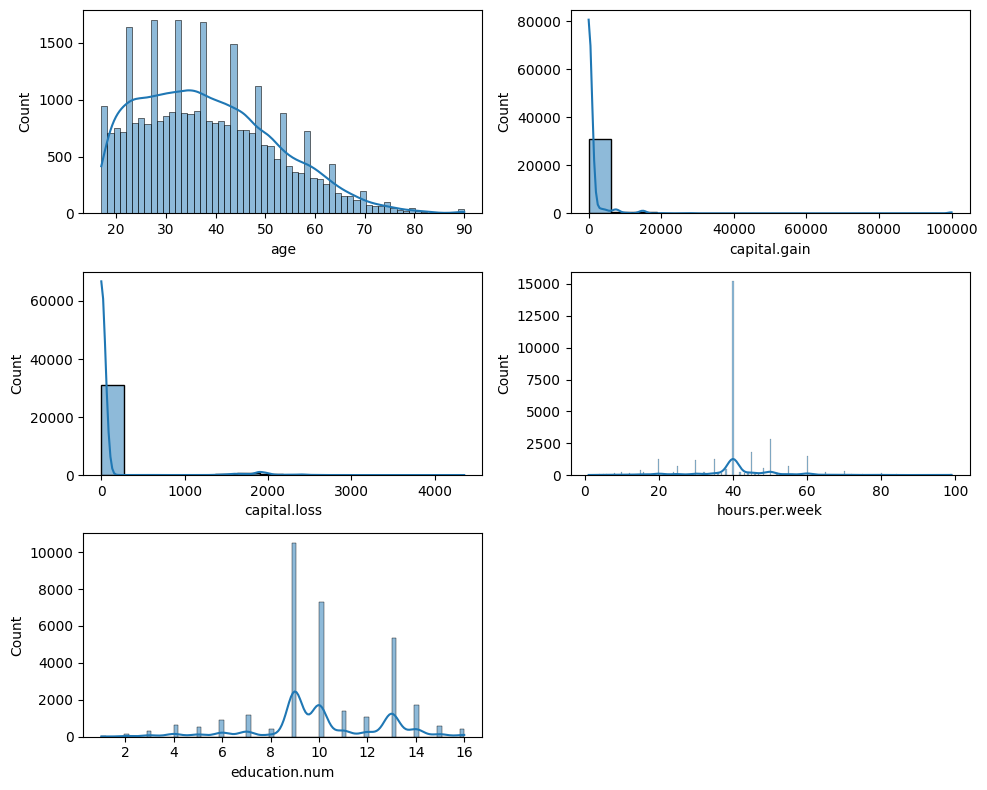

In [78]:
# --- we will also see for scaling numerical columns, which type of scale to use from its distribution ---

dum_cat = ['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'education.num']

fig, ax = plt.subplots(3, 2, figsize = (10, 8))
ax = ax.flatten()
for i, j in  enumerate(dum_cat):
    sns.histplot(df[j], kde = True, ax = ax[i])

for k in range(len(dum_cat), len(ax)):
    fig.delaxes(ax[k])
plt.tight_layout()
plt.show()

<pre>

- We can go with standard scaler on age, hours.per.week
- We will leave education.num as it is (ordinal one -- have meaning here)
- For capital loss and capital gain, we will use a log transformation and then will use a standard scaler on top of that!!
- Because both are heavily right skewed



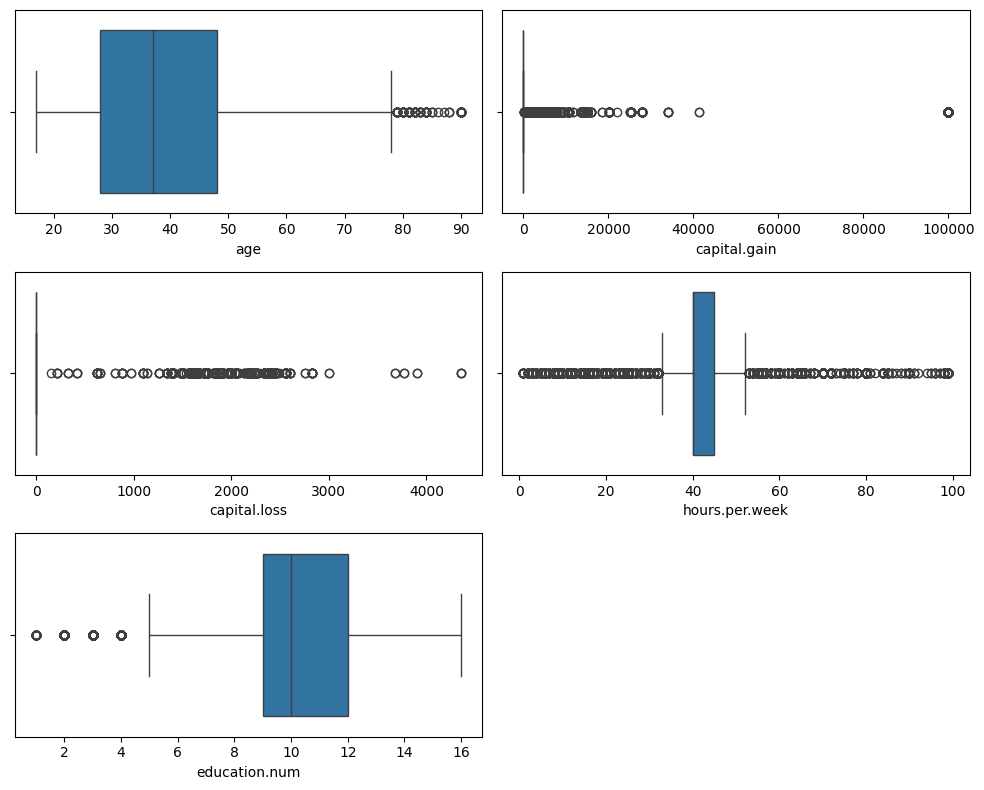

In [80]:
fig, ax = plt.subplots(3, 2, figsize = (10, 8))
ax = ax.flatten()
for i, j in  enumerate(dum_cat):
    sns.boxplot(x = df[j], ax = ax[i])

for k in range(len(dum_cat), len(ax)):
    fig.delaxes(ax[k])
plt.tight_layout()
plt.show()

<pre>
>> Judging from this figure, we can go with 

1) age ---- mild outliers ------> Standard scaler
2) capital gain and capital loss ---------------------> log transformation + standard scaler
3) hour per week -----------> Outliers on both side, so we will go with a robust scaler.
4) Education num is an ordinal one, so we will leave it as it is



In [85]:
# --- we will split the data before encoding to avoid data leakage ---
# --- Also, we will scale numerical cols as well ---

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 
'race', 'native.country']

binary_cols = ['sex']


numeric_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [86]:
numeric_transformer = ColumnTransformer(
    transformers = [
        ('age', StandardScaler(), ['age']), 

        ('cap_gain', 
        Pipeline(steps = [
            ('log', FunctionTransformer(np.log1p, feature_names_out = 'one-to-one')), 
            ('scaler', StandardScaler())
        ]), 
        ['capital.gain']), 

        ('cap_loss', 
        Pipeline(steps = [
            ('log', FunctionTransformer(np.log1p, feature_names_out = 'one-to-one')), 
            ('scaler', StandardScaler())
        ]), 
        ['capital.loss']), 

        ('hours', RobustScaler(), ['hours.per.week']), 

        ('education', 'passthrough', ['education.num'])
        
        
    ]
)

### Full Column Transformer (numeric + categorical + binary)

In [88]:
preprocessor = ColumnTransformer(
    transformers = [
        # Numeric features
        ('num', numeric_transformer, numeric_cols), 
        
        # Categorical features --- One Hot Encoding
        ('cat', 
        OneHotEncoder(
            drop = 'first', 
            handle_unknown = 'ignore', 
            sparse_output = False
        ), 
        categorical_cols), 

        # Binary feature --- passthrough

        ('bin', 'passthrough', binary_cols)
    ]
)

In [89]:
# --- Now our ingredients are ready to implement ---
# --- We will just split the dataset and then will fit_transform on train and will do a transformation on the test set ===

X, y = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [90]:
print(X_train.shape)
print(X_test.shape)

(26029, 12)
(6508, 12)


In [91]:
# --- All the preprocessing steps will be concluded here ---

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

/home/ashi4evr1/Projects/Transformer Experiments/pizza_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [96]:
feature_names = preprocessor.get_feature_names_out()

In [99]:
X_train_df = pd.DataFrame(X_train_preprocessed, columns = feature_names, index = X_train.index)

X_test_df = pd.DataFrame(X_test_preprocessed, columns = feature_names, index = X_test.index)


X_train_df.columns = (
    X_train_df.columns
    .str.replace('num__', '', regex=False)
    .str.replace('cat__', '', regex=False)
    .str.replace('bin__', '', regex=False)
)

X_test_df.columns = X_train_df.columns


In [104]:
print(f"Original shape of the dataset: {df.shape}")
print(f"Train shape after prprocessing: {X_train_df.shape}")

Original shape of the dataset: (32537, 13)
Train shape after prprocessing: (26029, 83)


In [103]:
X_train_df.sample(5)

,age__age,cap_gain__capital.gain,cap_loss__capital.loss,hours__hours.per.week,education__education.num,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,sex
17317,-0.771186,-0.300331,-0.222747,-4.8,10.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8186,-0.991443,-0.300331,-0.222747,1.0,11.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25038,-1.431956,-0.300331,-0.222747,1.0,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21926,2.018736,-0.300331,-0.222747,-6.4,13.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12212,0.550356,-0.300331,-0.222747,1.6,10.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<pre style = "color: orange">

<h2> Conclusion </h2>

"Although a simpler preprocessing would suffice, a feature-specific approach was adopted to demonstrate 
 careful handling of skewed distributions and real world data behavior."


 ### Data Cleaning 

- Checked and removed duplicate rows (none found)
- Standardized missing value markers ('?')
- Trimmed whitespace in categorical fields
- Verified data types

## Preprocessing

- Categorical encoding increased the feature space due to One-Hot-Encoding, which is expected.


## Scaling 

- education.num was not scaled, which is intentional, because it is an ordinal feature with a small bounded range (1-16), 
  so scaling was not required and we want our model to assume a higher weightage for higher ranks of education as well.

## Balancing

- The target variable is modelrately imbalanced, which will be addressed during model evaluation.


## Nested ColumnTransformer

- Nesting was used to apply different transformations to subsets of numerical features. 


